# Quick usage of CovserPhy

## Preparation

In [93]:
!pip install covsirphy

  Using cached covsirphy-2.4.1-py3-none-any.whl (75 kB)
You should consider upgrading via the '/mnt/c/Users/takay/Documents/github/covid19-sir/.venv/bin/python -m pip install --upgrade pip' command.


In [61]:
import covsirphy as cs
cs.__version__

'2.4.1'

## Dataset preparation

In [62]:
data_loader = cs.DataLoader("../input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [63]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [64]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [65]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
132699,2020-07-04,673564,446127,10011,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132700,2020-07-05,680283,449995,10145,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132701,2020-07-06,686852,453570,10280,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132702,2020-07-07,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132703,2020-07-08,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69


In [66]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
132699,2020-07-04,Russia,-,673564,217426,10011,446127
132700,2020-07-05,Russia,-,680283,220143,10145,449995
132701,2020-07-06,Russia,-,686852,223002,10280,453570
132702,2020-07-07,Russia,-,693215,219634,10478,463103
132703,2020-07-08,Russia,-,693215,219634,10478,463103


In [67]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
171,2020-07-04,6654,747,325,5582
172,2020-07-05,6765,823,325,5617
173,2020-07-06,6867,900,325,5642
174,2020-07-07,6973,942,325,5706
175,2020-07-08,7048,1017,325,5706


In [68]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-04,16735228,8254842,773565,7706821,0.046224,0.460515,0.091218
2020-07-05,17005584,8375852,777682,7852050,0.045731,0.461734,0.090117
2020-07-06,17226801,8428829,782281,8015691,0.045411,0.465304,0.088916
2020-07-07,17527492,8545566,789855,8192071,0.045064,0.467384,0.087938
2020-07-08,17527784,8563006,789859,8174919,0.045063,0.466398,0.088107


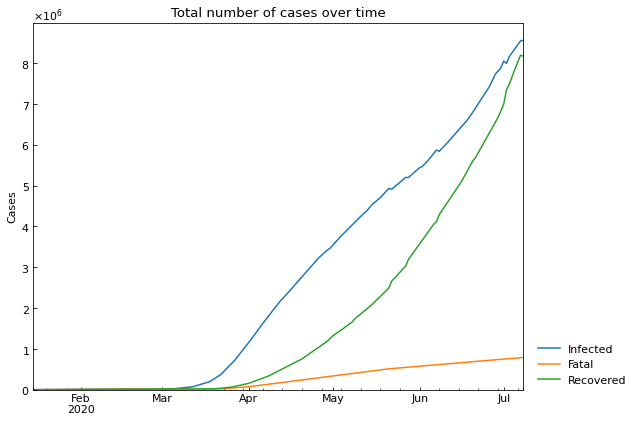

In [69]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [70]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
171,2020-07-04,38622,3121,1951,33550
172,2020-07-05,39026,3385,1951,33690
173,2020-07-06,39375,3582,1953,33840
174,2020-07-07,39792,3819,1957,34016
175,2020-07-08,40052,21265,1961,16826


In [71]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [72]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,19068,1226,976,16866
144,2020-07-04,19282,1346,977,16959
145,2020-07-05,19522,1495,977,17050
146,2020-07-06,19775,1674,977,17124
147,2020-07-07,19981,1806,978,17197


### Population in each country

In [73]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [74]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
132699,2020-07-04,673564,446127,10011,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132700,2020-07-05,680283,449995,10145,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132701,2020-07-06,686852,453570,10280,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132702,2020-07-07,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132703,2020-07-08,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69


In [75]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
132699,RUS,Russia,-,144478050
132700,RUS,Russia,-,144478050
132701,RUS,Russia,-,144478050
132702,RUS,Russia,-,144478050
132703,RUS,Russia,-,144478050


In [76]:
population_data.value("Japan", province=None)

44483162592

In [77]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

2467945629

### Government Response Tracker (OxCGRT)

In [78]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [79]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
132699,2020-07-04,673564,446127,10011,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132700,2020-07-05,680283,449995,10145,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132701,2020-07-06,686852,453570,10280,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132702,2020-07-07,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69
132703,2020-07-08,693215,463103,10478,144478050.0,RUS,NaN,Russia,2,2,2,4,1,2,2,4,2,3,2,72.69


In [80]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
132699,2020-07-04,Russia,RUS,2,2,2,4,1,2,2,4,2,3,2,72.69
132700,2020-07-05,Russia,RUS,2,2,2,4,1,2,2,4,2,3,2,72.69
132701,2020-07-06,Russia,RUS,2,2,2,4,1,2,2,4,2,3,2,72.69
132702,2020-07-07,Russia,RUS,2,2,2,4,1,2,2,4,2,3,2,72.69
132703,2020-07-08,Russia,RUS,2,2,2,4,1,2,2,4,2,3,2,72.69


In [81]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
171,2020-07-04,2,0,1,0,0,0,0,3,2,2,1,27.78
172,2020-07-05,2,0,1,0,0,0,0,3,2,2,1,27.78
173,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
174,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
175,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78


In [82]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
171,2020-07-04,2,0,1,0,0,0,0,3,2,2,1,27.78
172,2020-07-05,2,0,1,0,0,0,0,3,2,2,1,27.78
173,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
174,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
175,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [83]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

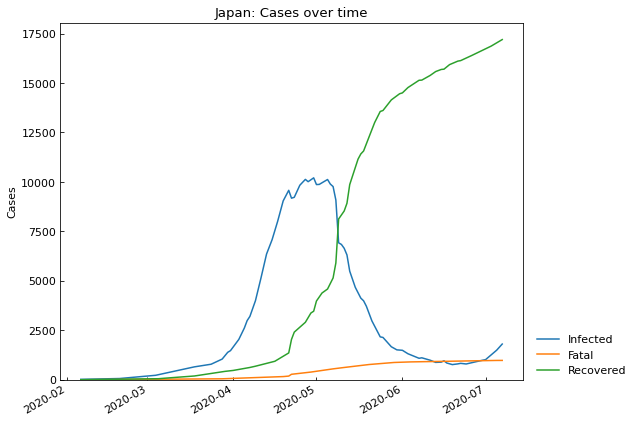

,Date,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,19068,1226,976,16866
144,2020-07-04,19282,1346,977,16959
145,2020-07-05,19522,1495,977,17050
146,2020-07-06,19775,1674,977,17124
147,2020-07-07,19981,1806,978,17197


In [84]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

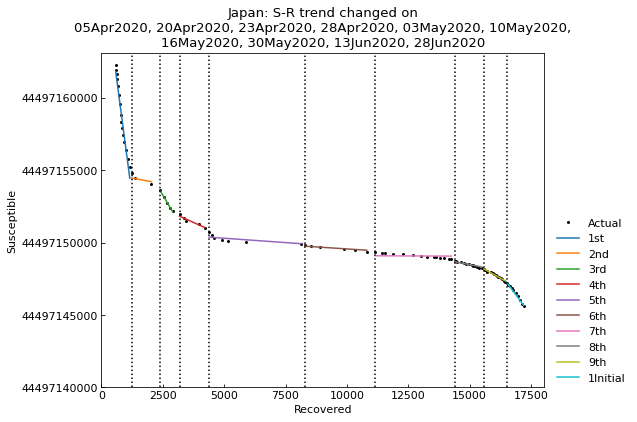

,Type,Start,End,Population
1st,Past,05Apr2020,19Apr2020,44497165565
2nd,Past,20Apr2020,22Apr2020,44497165565
3rd,Past,23Apr2020,27Apr2020,44497165565
4th,Past,28Apr2020,02May2020,44497165565
5th,Past,03May2020,09May2020,44497165565
6th,Past,10May2020,15May2020,44497165565
7th,Past,16May2020,29May2020,44497165565
8th,Past,30May2020,12Jun2020,44497165565
9th,Past,13Jun2020,27Jun2020,44497165565
10th,Past,28Jun2020,07Jul2020,44497165565


In [85]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [86]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>
Running optimization with 8 CPUs...
	10th phase with SIR-F model finished 75 in 1 min 2 sec.
	1st phase with SIR-F model finished 55 in 1 min 3 sec.
	2nd phase with SIR-F model finished 50 in 1 min 5 sec.
	3rd phase with SIR-F model finished 46 in 1 min 3 sec.
	4th phase with SIR-F model finished 48 in 1 min 4 sec.
	5th phase with SIR-F model finished 48 in 1 min 3 sec.
	6th phase with SIR-F model finished 48 in 1 min 4 sec.
	7th phase with SIR-F model finished 52 in 1 min 4 sec.
	8th phase with SIR-F model finished 56 in 1 min 3 sec.
	9th phase with SIR-F model finished 50 in 0 min 52 sec.
Completed optimization. Total: 5 min 14 sec


In [87]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,05Apr2020,19Apr2020,44497165565,SIR-F,0.009370,0.000851,0.505088,0.000309,180,4.00,0.505,404,13,146,1.758709,55,1 min 3 sec
2nd,Past,20Apr2020,22Apr2020,44497165565,SIR-F,0.004992,0.004159,0.157772,0.001978,180,0.69,0.158,63,25,30,0.223406,50,1 min 5 sec
3rd,Past,23Apr2020,27Apr2020,44497165565,SIR-F,0.005197,0.001567,0.157772,0.001978,180,1.23,0.158,63,24,79,0.378394,46,1 min 3 sec
4th,Past,28Apr2020,02May2020,44497165565,SIR-F,0.003180,0.002300,0.157772,0.001978,180,0.63,0.158,63,39,54,0.309068,48,1 min 4 sec
5th,Past,03May2020,09May2020,44497165565,SIR-F,0.001828,0.002640,0.157772,0.001978,180,0.33,0.158,63,68,47,0.382472,48,1 min 3 sec
6th,Past,10May2020,15May2020,44497165565,SIR-F,0.002307,0.008860,0.157772,0.001978,180,0.18,0.158,63,54,14,0.177937,48,1 min 4 sec
7th,Past,16May2020,29May2020,44497165565,SIR-F,0.001902,0.010201,0.157772,0.001978,180,0.13,0.158,63,65,12,0.264399,52,1 min 4 sec
8th,Past,30May2020,12Jun2020,44497165565,SIR-F,0.004625,0.007650,0.157772,0.001978,180,0.40,0.158,63,27,16,0.153927,56,1 min 3 sec
9th,Past,13Jun2020,27Jun2020,44497165565,SIR-F,0.011266,0.010769,0.027397,0.001819,180,0.87,0.027,68,11,11,0.096643,50,0 min 52 sec
10th,Past,28Jun2020,07Jul2020,44497165565,SIR-F,0.019411,0.009046,0.022161,0.005180,180,1.33,0.022,24,6,13,0.190385,75,1 min 2 sec


### Accuracy of estimation

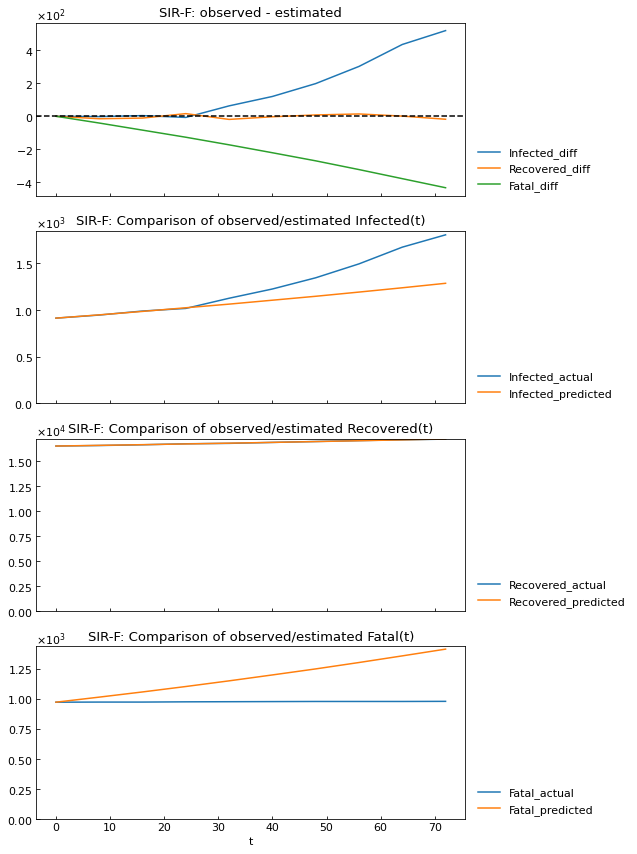

In [88]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [90]:
scenario.get("Rt", phase="4th")

0.63

### Show parameter history

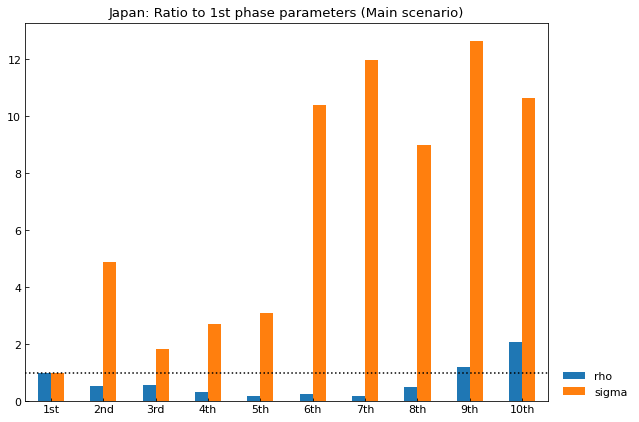

,rho,sigma
1st,1.000000,1.000000
2nd,0.532782,4.885437
3rd,0.554591,1.840316
4th,0.339396,2.701513
5th,0.195120,3.101411
6th,0.246202,10.407453
7th,0.202954,11.982789
8th,0.493572,8.985235
9th,1.202356,12.649839
10th,2.071589,10.625160


In [89]:
scenario.param_history(targets=["rho", "sigma"])

### Show the history of reproduction number

In [92]:
scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=False)

TypeError: line_plot() got an unexpected keyword argument 'show_figure'

### Simulate the number of cases

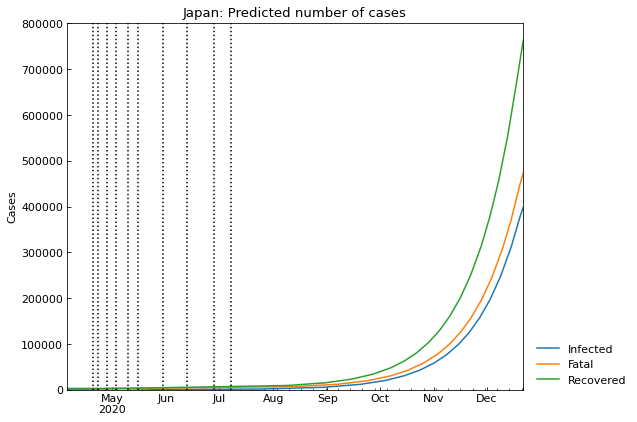

,Date,Fatal,Infected,Recovered,Susceptible
257,18Dec2020,414574,348511,667548,44495734929
258,19Dec2020,430522,362029,693262,44495679748
259,20Dec2020,447087,376071,719974,44495622429
260,21Dec2020,464293,390656,747718,44495562894
261,22Dec2020,474234,399083,763748,44495528498


In [98]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [101]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.009045653828574583

In [102]:
sigma_new = sigma_current * 2
sigma_new

0.018091307657149166

In [104]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End   Population    ODE       rho  \
Scenario Phase                                                               
Main     1st      Past  05Apr2020  19Apr2020  44497165565  SIR-F  0.009370   
         2nd      Past  20Apr2020  22Apr2020  44497165565  SIR-F  0.004992   
         3rd      Past  23Apr2020  27Apr2020  44497165565  SIR-F  0.005197   
         4th      Past  28Apr2020  02May2020  44497165565  SIR-F  0.003180   
         5th      Past  03May2020  09May2020  44497165565  SIR-F  0.001828   
         6th      Past  10May2020  15May2020  44497165565  SIR-F  0.002307   
         7th      Past  16May2020  29May2020  44497165565  SIR-F  0.001902   
         8th      Past  30May2020  12Jun2020  44497165565  SIR-F  0.004625   
         9th      Past  13Jun2020  27Jun2020  44497165565  SIR-F  0.011266   
         10th     Past  28Jun2020  07Jul2020  44497165565  SIR-F  0.019411   
         11th   Future  08Jul2020  01Jan2021  44497165565  SIR-F  0.019411   
Medicine 1st      Past  05Apr2020  19Apr2020  44497165565  SIR-F  0.009370   
         2nd      Past  20Apr2020  22Apr2020  44497165565  SIR-F  0.004992   
         3rd      Past  23Apr2020  27Apr2020  44497165565  SIR-F  0.005197   
         4th      Past  28Apr2020  02May2020  44497165565  SIR-F  0.003180   
         5th      Past  03May2020  09May2020  44497165565  SIR-F  0.001828   
         6th      Past  10May2020  15May2020  44497165565  SIR-F  0.002307   
         7th      Past  16May2020  29May2020  44497165565  SIR-F  0.001902   
         8th      Past  30May2020  12Jun2020  44497165565  SIR-F  0.004625   
         9th      Past  13Jun2020  27Jun2020  44497165565  SIR-F  0.011266   
         10th     Past  28Jun2020  07Jul2020  44497165565  SIR-F  0.019411   
         11th   Future  08Jul2020  07Aug2020  44497165565  SIR-F  0.019411   
         12th   Future  08Aug2020  01Jan2021  44497165565  SIR-F  0.019411   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.000851  0.505088  0.000309  180  4.00       0.505   
         2nd    0.004159  0.157772  0.001978  180  0.69       0.158   
         3rd    0.001567  0.157772  0.001978  180  1.23       0.158   
         4th    0.002300  0.157772  0.001978  180  0.63       0.158   
         5th    0.002640  0.157772  0.001978  180  0.33       0.158   
         6th    0.008860  0.157772  0.001978  180  0.18       0.158   
         7th    0.010201  0.157772  0.001978  180  0.13       0.158   
         8th    0.007650  0.157772  0.001978  180  0.40       0.158   
         9th    0.010769  0.027397  0.001819  180  0.87       0.027   
         10th   0.009046  0.022161  0.005180  180  1.33       0.022   
         11th   0.009046  0.022161  0.005180  180  1.33       0.022   
Medicine 1st    0.000851  0.505088  0.000309  180  4.00       0.505   
         2nd    0.004159  0.157772  0.001978  180  0.69       0.158   
         3rd    0.001567  0.157772  0.001978  180  1.23       0.158   
         4th    0.002300  0.157772  0.001978  180  0.63       0.158   
         5th    0.002640  0.157772  0.001978  180  0.33       0.158   
         6th    0.008860  0.157772  0.001978  180  0.18       0.158   
         7th    0.010201  0.157772  0.001978  180  0.13       0.158   
         8th    0.007650  0.157772  0.001978  180  0.40       0.158   
         9th    0.010769  0.027397  0.001819  180  0.87       0.027   
         10th   0.009046  0.022161  0.005180  180  1.33       0.022   
         11th   0.009046  0.022161  0.005180  180  1.33       0.022   
         12th   0.018091  0.022161  0.005180  180  0.82       0.022   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st               404            13            146    1.75871     55   
         2nd                63            25    

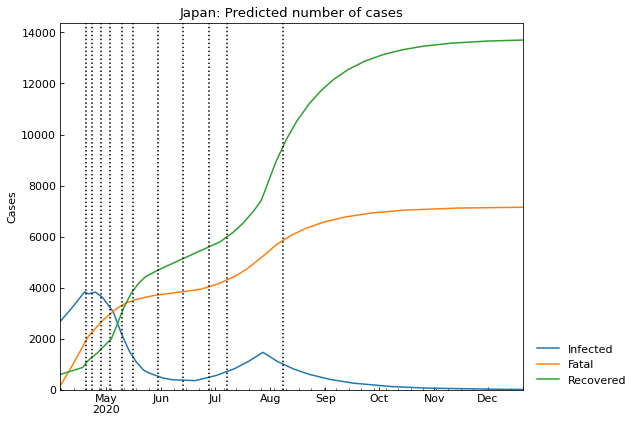

,Date,Fatal,Infected,Recovered,Susceptible
256,17Dec2020,7148,11,13696,44497144706
257,18Dec2020,7148,11,13698,44497144704
258,19Dec2020,7149,10,13699,44497144702
259,20Dec2020,7149,10,13701,44497144701
260,21Dec2020,7150,10,13702,44497144700


In [106]:
scenario.simulate(name="Medicine").tail()

## Compare the scenarios

In [107]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 22Dec2020,Fatal on 22Dec2020,Infected on 21Dec2020,Fatal on 21Dec2020
Main,399083,22Dec2020,399083.0,474234.0,NaN,NaN
Medicine,3837,19Apr2020,NaN,NaN,10.0,7150.0
